In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import numpy as nm
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_BRCpofr.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [4]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [5]:
df.describe(include='O')

,gender,area,qualification,income,num_policies,policy,type_of_policy
count,89392,89392,89392,89392,89392,89392,89392
unique,2,2,3,4,2,3,3
top,Male,Urban,High School,5L-10L,More than 1,A,Platinum
freq,50497,62455,46247,52716,60263,56644,47796


In [6]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [5]:
df[df.duplicated(keep='first')]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


### There are no duplicate values

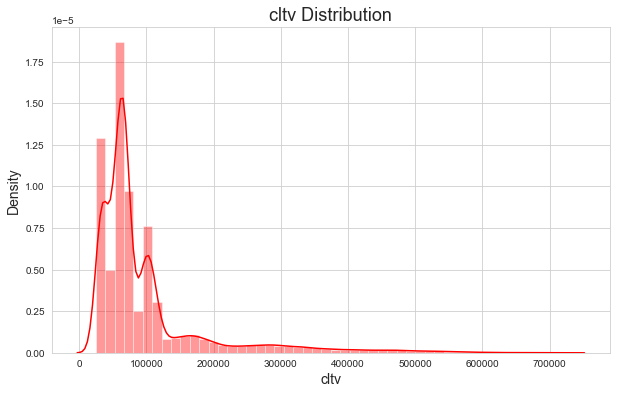

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df.cltv,color='r')
plt.title('cltv Distribution',size=18)
plt.xlabel('cltv',size=14)
plt.ylabel('Density',size=14)
plt.show()

### looks like positively skewd data


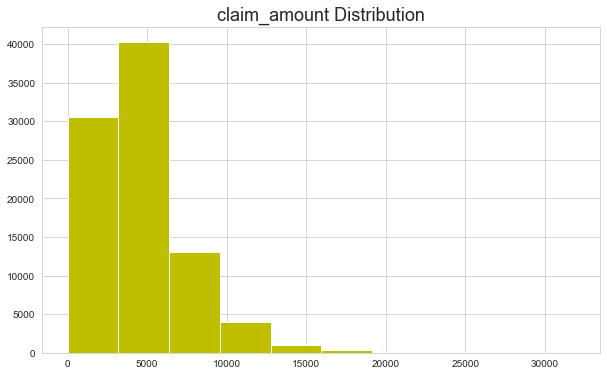

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df.claim_amount,color='y')
plt.title('claim_amount Distribution',size=18)
plt.show()

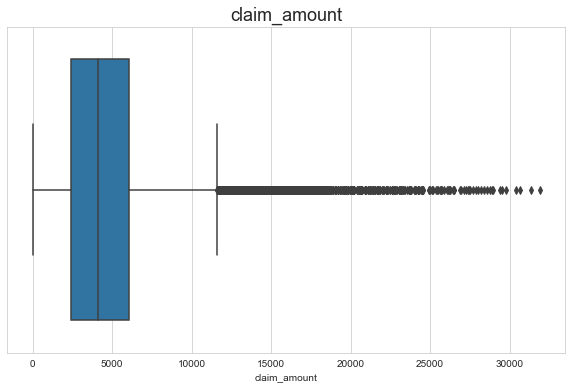

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(df.claim_amount)
plt.title('claim_amount',size=18)
plt.show()

In [12]:
Q1 = df['claim_amount'].quantile(0.25)
Q3 = df['claim_amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3688.0


In [13]:
Q1-1.5* IQR

-3126.0

In [14]:
Q3+1.5* IQR

11626.0

In [15]:
df[(df['claim_amount']< Q1-1.5* IQR)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [16]:
df[(df['claim_amount']> Q3+1.5* IQR)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
47,48,Female,Urban,Bachelor,2L-5L,1,6,16123,More than 1,A,Platinum,72168
101,102,Male,Urban,Bachelor,5L-10L,0,6,15703,More than 1,B,Platinum,63648
142,143,Male,Urban,High School,5L-10L,0,6,13304,More than 1,A,Platinum,360924
168,169,Male,Urban,Bachelor,2L-5L,0,4,12260,More than 1,A,Gold,131616
193,194,Male,Urban,High School,5L-10L,0,5,15311,1,A,Platinum,34980
...,...,...,...,...,...,...,...,...,...,...,...,...
89297,89298,Female,Urban,High School,More than 10L,0,2,12925,More than 1,A,Gold,60384
89342,89343,Male,Urban,High School,More than 10L,1,1,12159,More than 1,A,Platinum,55608
89353,89354,Female,Rural,Others,5L-10L,0,3,15361,More than 1,A,Platinum,66432
89357,89358,Male,Urban,High School,5L-10L,0,6,12911,More than 1,A,Silver,88908


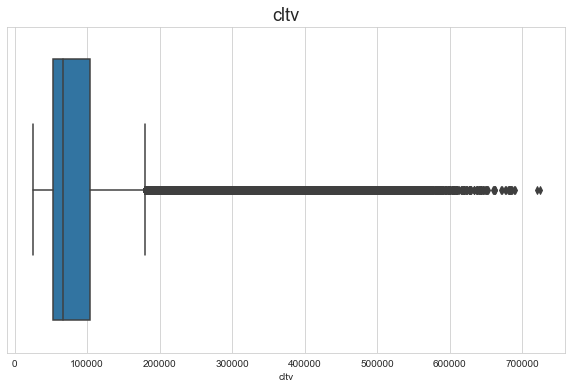

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(df.cltv)
plt.title('cltv',size=18)
plt.show()

In [18]:
Q2 = df['cltv'].quantile(0.25)
Q4 = df['cltv'].quantile(0.75)
IQR = Q4 - Q2
print(IQR)

50604.0


In [19]:
Q2-1.5* IQR

-23070.0

In [20]:
Q4+1.5* IQR

179346.0

In [21]:
df[(df['cltv']< Q2-1.5* IQR)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [22]:
df[(df['cltv']> Q4+1.5* IQR)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
23,24,Male,Urban,High School,5L-10L,1,7,2933,More than 1,A,Platinum,265080
28,29,Female,Urban,High School,5L-10L,0,5,8145,More than 1,A,Silver,262260
...,...,...,...,...,...,...,...,...,...,...,...,...
89350,89351,Male,Rural,High School,More than 10L,0,6,0,1,B,Platinum,231672
89355,89356,Male,Urban,High School,5L-10L,1,3,9577,More than 1,A,Platinum,293256
89371,89372,Male,Urban,Bachelor,5L-10L,1,8,17143,More than 1,A,Platinum,277056
89373,89374,Female,Urban,Bachelor,2L-5L,1,8,5365,More than 1,B,Platinum,276348


### Univariate Analysis for Categorical Features

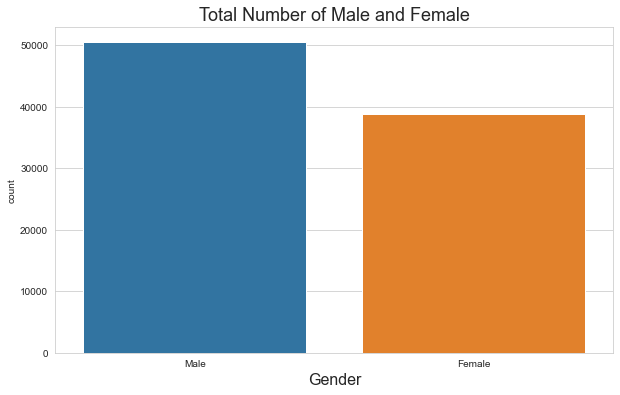

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'gender', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Gender',size=16)
plt.show()

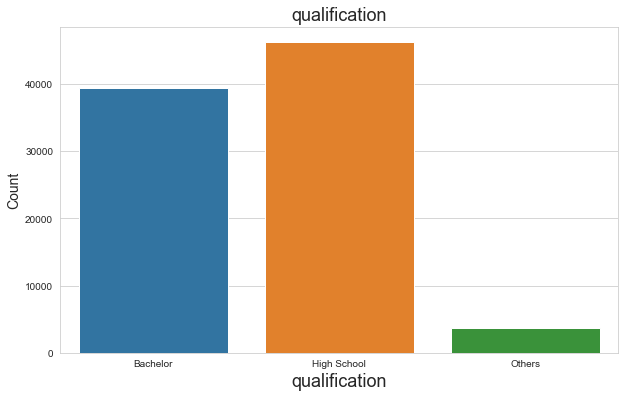

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(df.qualification)
plt.title('Qualification',size=18)
plt.xlabel('qualification',size=18)
plt.ylabel('Count',size=14)
plt.show()

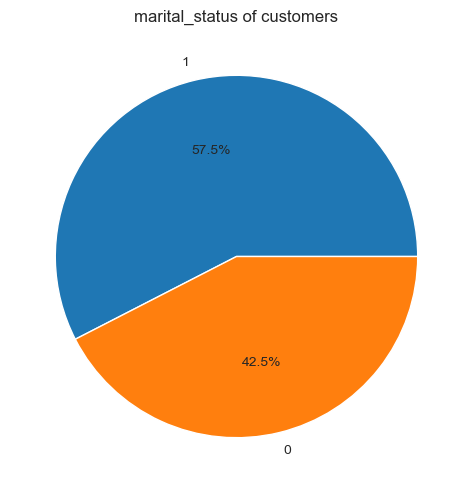

In [32]:
plt.figure(figsize = (6,6) , dpi = 100)
# plt.scatter, plt.bar, plt.barh, plt.plot
plt.pie(df['marital_status'].value_counts().values,
        labels = df['marital_status'].value_counts().index,autopct='%1.1f%%')
plt.title("marital_status of customers")

plt.show()

#### Majority of the customers are married

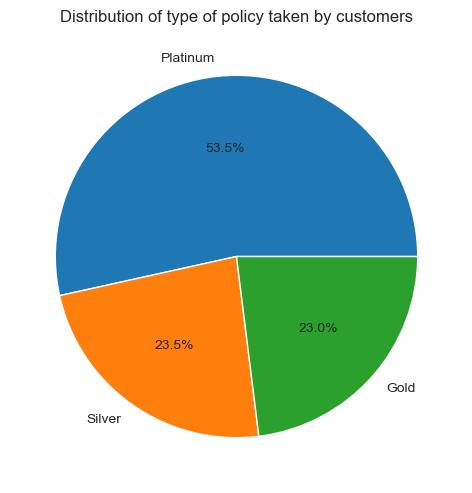

In [31]:
plt.figure(figsize = (6,6) , dpi = 100)
# plt.scatter, plt.bar, plt.barh, plt.plot
plt.pie(df['type_of_policy'].value_counts().values,
        labels = df['type_of_policy'].value_counts().index,autopct='%1.1f%%')
plt.title("Distribution of type of policy taken by customers")

plt.show()

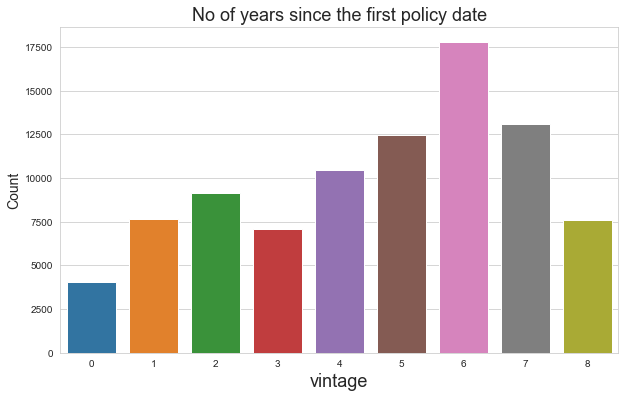

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(df.vintage)
plt.title('No of years since the first policy date',size=18)
plt.xlabel('vintage',size=18)
plt.ylabel('Count',size=14)
plt.show()

##### Most of the customers have taken policy 6 years ago

<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

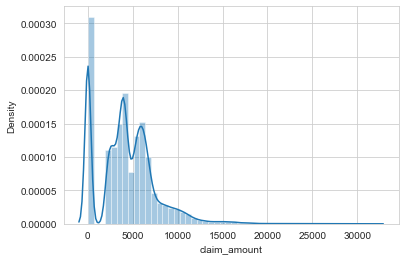

In [92]:
sns.distplot(df['claim_amount'])


In [ ]:
pt=PowerTransformer()

### Bivariant Analysis

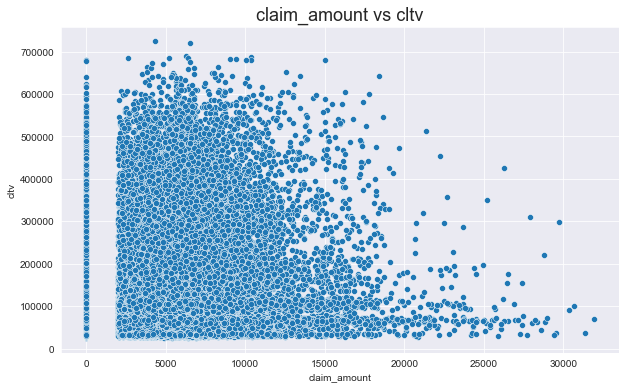

In [40]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.scatterplot(x='claim_amount',y='cltv',data=df)
plt.title('claim_amount vs cltv',size=18);

In [8]:
print('Correlation between claim_amount and cltv is : {}'.format(round(df.corr()['claim_amount']['cltv'],3)))

Correlation between claim_amount and cltv is : 0.18


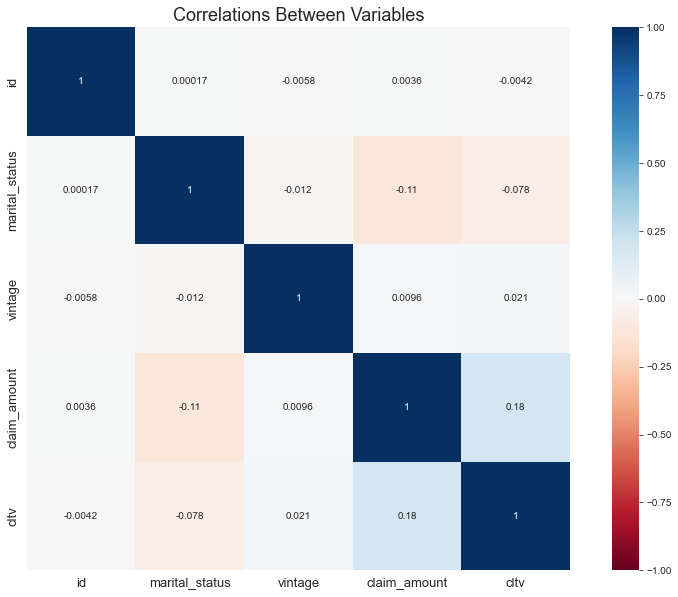

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

### Method 1: column transformation and Using GridserachCV to find the best model and corresponding params and then fit the model

In [3]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [4]:
df.drop('id',axis=1,inplace=True)

In [85]:
df.head(2)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400


In [23]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [5]:
categorical_vars = ['gender','area','qualification','income','marital_status','vintage','claim_amount','num_policies','policy','type_of_policy']
numeric_vars = ['cltv']

X = df[categorical_vars]
#X = df_copy[categorical_vars].copy().reset_index(drop=True)

X.head()

y = df[numeric_vars]
y.head()

,cltv
0,64308
1,515400
2,64212
3,97920
4,59736


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [7]:
two = ['Others', 'High School', 'Bachelor']
three = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']
four = [0, 1]
five = [0, 1, 2, 3, 4, 5, 6, 7, 8]
seven = ['1', 'More than 1']
eight = ['C', 'B', 'A']
nine = ['Silver', 'Gold', 'Platinum']

In [8]:
 trf2 = ColumnTransformer([
    ('powerT', PowerTransformer(), [6])
], remainder='passthrough')


In [9]:
ct = ColumnTransformer(transformers=[
        ('ohe',OneHotEncoder(sparse=False,drop='first'),[1,2]),
        ('ore',OrdinalEncoder(handle_unknown='error',categories=[two, three,five, seven, eight, nine]),
     [3,4,6,7,8,9])],remainder='passthrough')
    

In [12]:
X_train.shape

(71513, 10)

In [66]:
ct.fit_transform(df)[0:5]

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        5.7900e+03, 6.4308e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 8.0000e+00,
        5.0800e+03, 5.1540e+05],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 8.0000e+00,
        2.5990e+03, 6.4212e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 9.7920e+04],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00,
        3.5080e+03, 5.9736e+04]])

In [46]:
nm.set_printoptions(threshold=nm.inf)

In [22]:
X_train

,qualification,num_policies,type_of_policy,income,gender,area,policy,marital_status,vintage,claim_amount
31533,High School,More than 1,Gold,5L-10L,Male,Urban,C,0,4,6853
75212,High School,1,Silver,More than 10L,Male,Rural,B,0,5,3681
69510,Bachelor,1,Platinum,5L-10L,Male,Urban,A,0,5,5883
2076,High School,More than 1,Silver,5L-10L,Female,Rural,A,0,5,0
83252,Bachelor,More than 1,Silver,More than 10L,Male,Rural,B,1,8,0
...,...,...,...,...,...,...,...,...,...,...
57651,Bachelor,More than 1,Platinum,5L-10L,Female,Urban,A,0,7,8008
83984,High School,1,Silver,5L-10L,Female,Rural,B,1,4,0
40753,Bachelor,More than 1,Silver,5L-10L,Male,Rural,A,0,7,0
19776,Bachelor,More than 1,Silver,5L-10L,Female,Urban,A,0,0,5283


In [130]:
ct.transform(X_test).shape

(17879, 11)

In [132]:
df2_train

,qualification,num_policies,type_of_policy,income,gender,area,policyC,policyB,marital_status,vintage,claim_amount
0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,4.0,6853.0
1,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,5.0,3681.0
2,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,5.0,5883.0
3,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,1.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
71508,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,7.0,8008.0
71509,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0
71510,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0
71511,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5283.0


<AxesSubplot:ylabel='Density'>

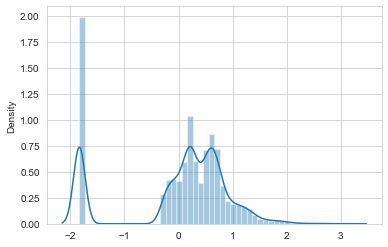

In [109]:
sns.distplot(df3_train)

In [133]:
df2_test = pd.DataFrame(ct.transform(X_test), columns =['qualification','num_policies','type_of_policy',
                                                        'income','gender','area','policyC','policyB',
                                                        'marital_status','vintage','claim_amount'])

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 
select = SelectKBest(score_func=f_regression, k=8)
z = select.fit(df2_train, y_train)
dfscores=pd.DataFrame(z.scores_)
dfcolumns=pd.DataFrame(df2_train.columns)
feature_scores=pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns=['Feature','Score']
feature_scores

,Feature,Score
0,qualification,60.895492
1,num_policies,10695.681032
2,type_of_policy,55.304988
3,income,410.034292
4,gender,0.279032
5,area,1328.018537
6,policyC,229.637810
7,policyB,79.171258
8,marital_status,432.934210
9,vintage,29.102652


In [25]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error

In [14]:
# Initialze the estimators
clf1 = RandomForestRegressor(random_state=42)
clf2 = XGBRegressor(random_state=42)
clf3 = GradientBoostingRegressor(random_state=42)
clf4 = DecisionTreeRegressor(random_state=42)
clf5 = LGBMRegressor(random_state=42)

In [15]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['regressor__n_estimators'] = [10,100,1000]
param1['regressor__max_depth'] = [5, 10, 20]
param1['regressor__min_samples_leaf'] = [2,5,10]
param1['regressor__max_leaf_nodes'] = [2,5,10]
param1['regressor'] = [clf1]

param2 = {}
param2['regressor__n_estimators'] = [10, 100,1000]
param2['regressor__max_depth'] = [5, 10, 20]
param2['regressor__min_child_weight'] = [1,5,10]
param2['regressor__gamma'] = [0.5, 1, 1.5, 2, 5]
param2['regressor__colsample_bytree']= [0.6, 0.8, 1.0]
param2['regressor__learning_rate'] = [0.1,0.5,0.8]
param2['regressor'] = [clf2]

param3 = {}
param3['regressor__n_estimators'] = [10,100,1000]
param3['regressor__max_depth'] = [5, 10, 20]
param3['regressor__learning_rate'] = [0.1,0.5,0.8]
param3['regressor'] = [clf3]

param4 = {}
param4['regressor__max_depth'] = [5,10,20]
param4['regressor__min_samples_split'] = [2,5,10]
param4['regressor__min_samples_leaf'] = [2,5,10]
param4['regressor__max_leaf_nodes'] = [2,5,10]
param4['regressor'] = [clf4]

param5 = {}
param5['regressor__n_estimators'] = [10, 100,1000]
param5['regressor__max_depth'] = [5, 10, 20]
param5['regressor__min_child_weight'] = [1,5,10]
param5['regressor__colsample_bytree']= [0.6, 0.8, 1.0]
param5['regressor__learning_rate'] = [0.1,0.5,0.8]
param5['regressor'] = [clf5]


In [22]:
pipeline = Pipeline([('regressor', clf1)])
params = [param1,param2,param3,param4,param5]

In [ ]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)

In [1]:
## Fitting all the 5 models on huge train dataset was taking lot of time and memory hence took 2-3 models at a time and found their best params

In [ ]:
pipeline1 = Pipeline([('regressor', clf5)])
params1 = [param5]

In [ ]:
gs.fit(df2_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor',
                                        GradientBoostingRegressor(learning_rate=0.5,
                                                                  max_depth=5,
                                                                  max_leaf_nodes=5,
                                                                  min_samples_leaf=10,
                                                                  n_estimators=10,
                                                                  random_state=42))]),
             n_jobs=-1,
             param_grid=[{'regressor': [GradientBoostingRegressor(learning_rate=0.5,
                                                                  max_depth=5,
                                                                  max_leaf_nodes=5,
                                                                  min_samples_leaf=10,
                                                                  n_estimators=10,
                                                                  random_state=42)],
                          'regressor__learning_rate': [0.1, 0.5, 0.8],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__max_leaf_nodes': [2, 5, 10],
                          'regressor__min_samples_leaf': [2, 5, 10],
                          'regressor__min_samples_split': [2, 5, 10],
                          'regressor__n_estimators': [2, 5, 10, 15]}],
             verbose=3)

In [136]:
pipeline1 = Pipeline([('regressor', clf3)])
params1 = [param3]

In [138]:
# Train the grid search model
gs = GridSearchCV(pipeline1, params1, cv=3, n_jobs=-1, verbose=1,scoring='r2')

In [139]:
gs.fit(df2_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor',
                                        GradientBoostingRegressor(max_depth=5,
                                                                  max_leaf_nodes=5,
                                                                  min_samples_leaf=10,
                                                                  random_state=42))]),
             n_jobs=-1,
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=5,
                                                                  max_leaf_nodes=5,
                                                                  min_samples_leaf=10,
                                                                  random_state=42)],
                          'regressor__learning_rate': [0.1, 0.5, 0.8],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__n_estimators': [10, 100, 1000]}],
             scoring='r2', verbose=1)

In [140]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'regressor': GradientBoostingRegressor(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                           random_state=42),
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 100}

In [16]:
clf1 = RandomForestRegressor(random_state=42)
clf3 = GradientBoostingRegressor(random_state=42)
clf5 = LGBMRegressor(random_state=42)

In [132]:
two = ['Others', 'High School', 'Bachelor']
three = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']
four = [0, 1]
five = [0, 1, 2, 3, 4, 5, 6, 7, 8]
seven = ['1', 'More than 1']
eight = ['C', 'B', 'A']
nine = ['Silver', 'Gold', 'Platinum']

In [98]:
 trf2 = ColumnTransformer([
    ('powerT', PowerTransformer(), [6])
], remainder='passthrough')


In [99]:
ct = ColumnTransformer(transformers=[
        ('ohe',OneHotEncoder(sparse=False,drop='first'),[1,2,8]),
        ('ore',OrdinalEncoder(handle_unknown='error',categories=[two, three,five, seven, nine]),
     [3,4,6,7,9])],remainder='passthrough')
    

In [28]:
pipeline3 = Pipeline([("PowerTransform",trf2),("ct-transform", ct),("regressor", clf1)])
params3 = [param1,param3,param5]

In [31]:
# Train the grid search model
gs = GridSearchCV(pipeline3, params3,cv=3,n_jobs=-1, verbose=1,scoring='r2')

In [32]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 351 candidates, totalling 1053 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('PowerTransform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('powerT',
                                                                         PowerTransformer(),
                                                                         [6])])),
                                       ('ct-transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         [1,
                                                                          2]),
                                                                        ('ore',
                                                                         OrdinalEncoder(categories=[['Others',
                                                                                                     'High '
                                                                                                     'School',
                                                                                                     'Bachelor...
                          'regressor__n_estimators': [10, 100, 1000]},
                         {'regressor': [LGBMRegressor(colsample_bytree=0.6,
                                                      max_depth=5,
                                                      min_child_weight=1,
                                                      random_state=42)],
                          'regressor__colsample_bytree': [0.6, 0.8, 1.0],
                          'regressor__learning_rate': [0.1, 0.5, 0.8],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__min_child_weight': [1, 5, 10],
                          'regressor__n_estimators': [10, 100, 1000]}],
             scoring='r2', verbose=1)

In [33]:
gs.best_params_

{'regressor': LGBMRegressor(colsample_bytree=0.6, max_depth=5, min_child_weight=1,
               random_state=42),
 'regressor__colsample_bytree': 0.6,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__min_child_weight': 1,
 'regressor__n_estimators': 100}

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score
ypred = gs.predict(X_test)
r2_score(y_test, ypred)

0.15817516467724757

### Method 2 : First column transformation then passing the data through list of models and then selecting one model based on r2 score

In [132]:
two = ['Others', 'High School', 'Bachelor']
three = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']
four = [0, 1]
five = [0, 1, 2, 3, 4, 5, 6, 7, 8]
seven = ['1', 'More than 1']
eight = ['C', 'B', 'A']
nine = ['Silver', 'Gold', 'Platinum']

In [98]:
 trf2 = ColumnTransformer([
    ('powerT', PowerTransformer(), [6])
], remainder='passthrough')


In [99]:
ct = ColumnTransformer(transformers=[
        ('ohe',OneHotEncoder(sparse=False,drop='first'),[1,2,8]),
        ('ore',OrdinalEncoder(handle_unknown='error',categories=[two, three,five, seven, nine]),
     [3,4,6,7,9])],remainder='passthrough')
    

In [ ]:
pipeline4.fit_transform(X_train)

In [100]:
pipeline4=Pipeline([("PowerTransform",trf2),("ct-transform", ct)])

## Pipeline with Power Transformer did not give good r2 score hence i did only column transformation using one hot encoding and ordinal encoding and left 'Claim_amount' columns as it is

## While using pipeline we cannot give column names it should be in index form i.e column number

In [133]:
ct = ColumnTransformer(transformers=[
        ('ohe',OneHotEncoder(sparse=False,drop='first'),['gender','area','policy']),
        ('ore',OrdinalEncoder(handle_unknown='error',categories=[two, three,five, seven, nine]),
     ['qualification','income','vintage','num_policies','type_of_policy'])],remainder='passthrough')
    

In [ ]:
ct.fit_transform(X_train)

In [135]:
df2_train = pd.DataFrame(ct.fit_transform(X_train), columns =['gender','area','policy_B','policy_C','qualification','income', 'vintage','num_policies','type_of_policy',
                                                       'marital_status','claim_amount'])

In [105]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71513 entries, 0 to 71512
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          71513 non-null  float64
 1   area            71513 non-null  float64
 2   policy_B        71513 non-null  float64
 3   policy_C        71513 non-null  float64
 4   qualification   71513 non-null  float64
 5   income          71513 non-null  float64
 6   vintage         71513 non-null  float64
 7   num_policies    71513 non-null  float64
 8   type_of_policy  71513 non-null  float64
 9   marital_status  71513 non-null  float64
 10  claim_amount    71513 non-null  float64
dtypes: float64(11)
memory usage: 6.0 MB


In [ ]:
ct.transform(X_test)

In [138]:
df2_test= pd.DataFrame(ct.transform(X_test), columns =['gender','area','policy_B','policy_C','qualification','income', 'vintage','num_policies','type_of_policy',
                                                       'marital_status','claim_amount'])

In [163]:
df2_train.shape

(71513, 11)

In [63]:
y_train

,cltv
31533,486072
75212,32124
69510,34572
2076,73644
83252,61236
...,...
57651,118404
83984,31008
40753,105204
19776,108648


In [142]:
algos = [RandomForestRegressor(random_state = 200),XGBRegressor(random_state = 200),
          GradientBoostingRegressor(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,learning_rate=0.1,
    n_estimators=100,random_state = 200),DecisionTreeRegressor(random_state = 200),LinearRegression(),LGBMRegressor(colsample_bytree=0.6, max_depth=5, min_child_weight=1,random_state=200)]

names = ['RandomForestRegressor','XGBRegressor','GradientBoostingRegressor', 'Decision Tree Regressor','LinearRegression','LightGBM']

r2_scores =[]
MAE=[]

In [143]:
# building a model
from sklearn.metrics import mean_absolute_error, r2_score
score=0
for name in (algos):
    model = name
    model.fit(df2_train,y_train)
    y_pred = model.predict(df2_test)
    score=r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2_scores.append(score)
    MAE.append(mae)

In [144]:
evaluation = pd.DataFrame({'Model': names,
                           'r2_score': r2_scores,
                          'MAE':MAE})
evaluation

,Model,r2_score,MAE
0,RandomForestRegressor,0.035037,54766.764303
1,XGBRegressor,0.135706,50739.807145
2,GradientBoostingRegressor,0.158267,50024.658254
3,Decision Tree Regressor,-0.716098,66897.791631
4,LinearRegression,0.149706,51034.734706
5,LightGBM,0.157068,50005.706472


### From the above table GradientBoostingRegressor has the best r2 score hence fitting the model to Xtrain with best params taken from gridsearch in method 1

In [117]:
from sklearn.model_selection import cross_val_score

In [156]:
pipe=Pipeline([('ct',ct),('GradientBoostingRegressor',GradientBoostingRegressor(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,learning_rate=0.1,
    n_estimators=100,random_state = 200))])


In [158]:
pipe.fit( X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'area', 'policy']),
                                                 ('ore',
                                                  OrdinalEncoder(categories=[['Others',
                                                                              'High '
                                                                              'School',
                                                                              'Bachelor'],
                                                                             ['<=2L',
                                                                              '2L-5L',
                                                                              '5L-10L',
                                                                              'More '
                                                                              'than '
                                                                              '10L'],
                                                                             [0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             ['1',
                                                                              'More '
                                                                              'than '
                                                                              '1'],
                                                                             ['Silver',
                                                                              'Gold',
                                                                              'Platinum']]),
                                                  ['qualification', 'income',
                                                   'vintage', 'num_policies',
                                                   'type_of_policy'])])),
                ('GradientBoostingRegressor',
                 GradientBoostingRegressor(max_depth=5, max_leaf_nodes=5,
                                           min_samples_leaf=10,
                                           random_state=200))])

In [162]:
y_pred = pipe.predict(X_test)
score=r2_score(y_test,y_pred)
print("r2_score for GradientBoosting_model: ",score)

r2_score for GradientBoosting_model:  0.1582665696941682


In [157]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2').mean()

0.15994354639114744

In [165]:
cross_val_score(pipe, X_test, y_test, cv=5, scoring='r2').mean()

0.1527310627934322

### Crossvalidation on the entire train dataset

In [167]:
cross_val_score(pipe, df.drop('cltv',axis=1), df['cltv'], cv=5, scoring='r2').mean()

0.16028751598357727

In [150]:
test=pd.read_csv('test_koRSKBP.csv')

In [166]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


### Predicting on test data

In [159]:
# prediction of test data

preds = pipe.predict(test.iloc[:,1:])

In [161]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['cltv'] = preds
submission.to_csv('test_predictions.csv', index=False)